In [64]:
import pandas as pd
import numpy as np
from numpy import median, average
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3  
from sqlalchemy import create_engine, select, MetaData, Table, Integer, String, inspect, Column, ForeignKey
import os

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

# First Set of Data

In [2]:
engine = create_engine('sqlite:////Users/marvinchan/Documents/PythonProgramming/apartment_scraper/apartments.db', echo=False)
connection = engine.raw_connection()
cursor = connection.cursor()
data = pd.read_sql_query('SELECT * FROM listings', connection)

In [7]:
data['city'] = ''

In [11]:
locations = sorted(data['location'].unique())
locations

['1990 Latham Street',
 '2006 Latham Street',
 '2020 Latham Street',
 '214 Lafayette Ave, Hayward, CA',
 '300 Talbot Ave, Santa Rosa, CA 95405',
 '570 Mariposa St San Francisco, California CA',
 '628 A Fell Street, San Francisco, CA',
 '880/85',
 'Airport~San Bruno',
 'Alameda',
 'Albany, CA',
 'Bay AREA',
 'Berkeley',
 'Burlingame',
 'Castro Valley',
 'Concord East bay near BART',
 'Downtown Mountain View',
 'Downtown Oakland',
 'East Oakland',
 'Emeryville',
 'Excelsior',
 'Fremont',
 'Gilroy',
 'Golden Gate Height',
 'Hayes Valley - San Francisco',
 'Hayes valley',
 'Hayward, CA',
 'Hillsborough',
 'Inner Richmond',
 'Jack London Square',
 'LOWER PACIFIC HEIGHTS',
 'Livermore',
 'Los Altos',
 'Milpitas',
 'Mission Terrace',
 'Nob Hill',
 'North Oakland',
 'Oakland',
 'Oakland hills',
 'Outer Richmond/ Sea Cliff',
 'Pacific Heights',
 'Petaluma',
 'Presidio',
 'Richmond',
 'Ricon Hill / SOMA / South Beach',
 'SOMA / south beach',
 'Salinas',
 'San Francisco',
 'San Francisco Richmond

In [35]:
city = {
    'oakland' : ['oakland downtown',
 'oakland east',
 'oakland hills / mills',
 'oakland lake merritt / grand',
 'oakland north / temescal',
 'oakland piedmont / montclair',
 'oakland rockridge / claremont',
 'oakland west', 'Jack London Square', 'Downtown Oakland',
 'East Oakland',  'North Oakland',
 'Oakland',
 'Oakland hills', 'West Oakland', 'Telegraph and 30th'],
    'berkeley' : ['south Berkeley', 'Berkeley', 'Albany, CA', 'berkeley',
 'berkeley north / hills', 'Emeryville', 'albany / el cerrito', 'emeryville'],
    'alameda' : ['Alameda', 'alameda'],
    'san jose' : ['san jose',
 'san jose downtown',
 'san jose east',
 'san jose north',
 'san jose south',
 'san jose west', '880/85', 'San Jose',
 'San Jose West', 'campbell',
 'San Jose, CA', 'silver creek/evergreen', 'sunnyvale', 'willow glen / cambrian'],
    'san francisco' : ['visitacion valley', 'Presidio', '570 Mariposa St San Francisco, California CA', 'bernal heights', 'Excelsior',
 '628 A Fell Street, San Francisco, CA', 'Golden Gate Height',
 'Hayes Valley - San Francisco',
 'Hayes valley', 'San Francisco','SoMa',
 'San Francisco Richmond/Seacliff',
 'San Francisco, CA', 'Ricon Hill / SOMA / South Beach',
 'SOMA / south beach', 'San francisco', 'twin peaks / diamond hts', 'potrero hill', 'sunset / parkside',
 'tenderloin', 'Inner Richmond', 'bayview', 'LOWER PACIFIC HEIGHTS', 'Mission Terrace', 'Nob Hill', 
 'Outer Richmond/ Sea Cliff', 'Pacific Heights', 'USF / panhandle', 'castro / upper market', 
 'alamo square / nopa', 'cole valley / ashbury hts', 'atherton', 'downtown / civic / van ness', 
 'ingleside / SFSU / CCSF', 'inner richmond', 'inner sunset / UCSF', 'laurel hts / presidio',
 'excelsior / outer mission', 'financial district', 'glen park', 'haight ashbury', 'hayes valley'
 'lower haight', 'lower nob hill', 'lower pac hts', 'marina / cow hollow', 
 'nob hill', 'mission district', 'noe valley', 'north beach / telegraph hill', 
 'western addition', 'west portal / forest hill', 'russian hill' ,'portola district','pacifica','pacific heights'],
     'south san francisco' : ['san bruno', 'millbrae', 'south san francisco', 'Burlingame', 'burlingame', 'Hillsborough', 'belmont', 'san mateo', 'daly city', 'foster city', 'menlo park'],
     'south bay' : ['saratoga', 'san carlos', 'redwood shores', 'redwood city', '1990 Latham Street', 'Downtown Mountain View', 'mountain view', '2006 Latham Street', 'Airport~San Bruno',
 '2020 Latham Street', 'Bay AREA', 'Sunny',
 'Sunnyvale', 'cupertino', 'east palo alto', 'los altos', 'Los Altos', 
 'morgan hill','los gatos', 'palo alto'],
    'hayward/dublin' : ['san leandro', 'hayward / castro valley', 'hayward', 'dublin / pleasanton / livermore', 'San Ramon', 'danville / san ramon', '214 Lafayette Ave, Hayward, CA', 'Castro Valley', 'Hayward, CA', 'Livermore'],
    'santa rosa' : ['sebastopol', 'rohnert pk / cotati', 'lake county', '300 Talbot Ave, Santa Rosa, CA 95405', 'Santa Rosa','santa rosa'],
    'concord' : ['walnut creek', 'pittsburg / antioch', 'lafayette / orinda / moraga', 'hercules, pinole, san pablo, el sob', 'Concord East bay near BART', 'brentwood / oakley', 'concord / pleasant hill / martinez'],
    'fremont/milpitas' : ['santa clara', 'milpitas', 'Fremont',  'Milpitas', 'Union City', 'fremont / union city / newark'],
    'santa cruz/gilroy' : ['watsonville', 'soquel', 'scotts valley', 'santa cruz', 'Gilroy', 'half moon bay', 'aptos', 'capitola', 'Salinas', 'santa cruz mountains', 'Valley >> Santa Cruz', 'gilroy'],
    'north bay' : ['sonoma', 'Petaluma', 'petaluma', 'novato', 'healdsburg / windsor'],
    'vallejo/richmond' : ['richmond / seacliff', 'richmond / point / annex', 'napa county', 'Richmond', 'vallejo / benicia', 'fairfield / vacaville'],
    'marin/san rafael' : ['west marin', 'sausalito', 'san rafael', 'san anselmo', 'mill valley', 'larkspur', 'Sausalito', 'kentfield / ross', 'corte madera', 'fairfax', 'greenbrae'],
    'lake tahoe' : ['South Lake Tahoe, CA', 'Tahoe Village, Stateline, NV'],
    'tracy' : ['Tracy', 'Tracy CA', 'Tracy, CA'],
    'sacramento' : ['West Sacramento'],
    'outside bay area': ['tiburon / belvedere']}

In [39]:
data['location'] = data['location'].str.lower()
data['location'].unique()

array(['lower nob hill', 'santa clara', 'west oakland', 'mountain view',
       'oakland north / temescal', 'north oakland', 'santa cruz',
       'san jose downtown', 'nob hill', 'oakland downtown',
       'excelsior / outer mission', 'ingleside / sfsu / ccsf', 'berkeley',
       'san leandro', 'san jose east', 'vallejo / benicia',
       'laurel hts / presidio', 'redwood city', 'alameda', 'tenderloin',
       'soma / south beach', 'san mateo', 'usf / panhandle',
       'walnut creek', 'richmond / seacliff', 'oakland east',
       'bernal heights', 'telegraph and 30th', 'sunnyvale',
       'redwood shores', 'financial district', '2006 latham street',
       'haight ashbury', 'west portal / forest hill',
       'dublin / pleasanton / livermore', 'palo alto', 'san jose north',
       'hayes valley', 'oakland hills / mills', 'mill valley',
       'cupertino', 'daly city', 'alamo square / nopa', 'pacific heights',
       'lower pac hts', 'albany / el cerrito', '2020 latham street',
       

In [54]:
city

{'oakland': ['downtown oakland',
  'east oakland',
  'jack london square',
  'north oakland',
  'oakland',
  'oakland downtown',
  'oakland east',
  'oakland hills',
  'oakland hills / mills',
  'oakland lake merritt / grand',
  'oakland north / temescal',
  'oakland piedmont / montclair',
  'oakland rockridge / claremont',
  'oakland west',
  'telegraph and 30th',
  'west oakland'],
 'berkeley': ['albany / el cerrito',
  'albany, ca',
  'berkeley',
  'berkeley north / hills',
  'emeryville',
  'south berkeley'],
 'alameda': ['alameda'],
 'san jose': ['880/85',
  'campbell',
  'san jose',
  'san jose downtown',
  'san jose east',
  'san jose north',
  'san jose south',
  'san jose west',
  'san jose, ca',
  'silver creek/evergreen',
  'sunnyvale',
  'willow glen / cambrian'],
 'san francisco': ['570 mariposa st san francisco, california ca',
  '628 a fell street, san francisco, ca',
  'alamo square / nopa',
  'atherton',
  'bayview',
  'bernal heights',
  'castro / upper market',
  'co

In [53]:
import itertools

for k, v in city.items():
    v.sort()
    city[k] = [item for item, _ in itertools.groupby(v)]
    
city

{'oakland': ['downtown oakland',
  'east oakland',
  'jack london square',
  'north oakland',
  'oakland',
  'oakland downtown',
  'oakland east',
  'oakland hills',
  'oakland hills / mills',
  'oakland lake merritt / grand',
  'oakland north / temescal',
  'oakland piedmont / montclair',
  'oakland rockridge / claremont',
  'oakland west',
  'telegraph and 30th',
  'west oakland'],
 'berkeley': ['albany / el cerrito',
  'albany, ca',
  'berkeley',
  'berkeley north / hills',
  'emeryville',
  'south berkeley'],
 'alameda': ['alameda'],
 'san jose': ['880/85',
  'campbell',
  'san jose',
  'san jose downtown',
  'san jose east',
  'san jose north',
  'san jose south',
  'san jose west',
  'san jose, ca',
  'silver creek/evergreen',
  'sunnyvale',
  'willow glen / cambrian'],
 'san francisco': ['570 mariposa st san francisco, california ca',
  '628 a fell street, san francisco, ca',
  'alamo square / nopa',
  'atherton',
  'bayview',
  'bernal heights',
  'castro / upper market',
  'co

In [57]:
reversed_dict = {val: key for key in city for val in city[key]}
reversed_dict

{'downtown oakland': 'oakland',
 'east oakland': 'oakland',
 'jack london square': 'oakland',
 'north oakland': 'oakland',
 'oakland': 'oakland',
 'oakland downtown': 'oakland',
 'oakland east': 'oakland',
 'oakland hills': 'oakland',
 'oakland hills / mills': 'oakland',
 'oakland lake merritt / grand': 'oakland',
 'oakland north / temescal': 'oakland',
 'oakland piedmont / montclair': 'oakland',
 'oakland rockridge / claremont': 'oakland',
 'oakland west': 'oakland',
 'telegraph and 30th': 'oakland',
 'west oakland': 'oakland',
 'albany / el cerrito': 'berkeley',
 'albany, ca': 'berkeley',
 'berkeley': 'berkeley',
 'berkeley north / hills': 'berkeley',
 'emeryville': 'berkeley',
 'south berkeley': 'berkeley',
 'alameda': 'alameda',
 '880/85': 'san jose',
 'campbell': 'san jose',
 'san jose': 'san jose',
 'san jose downtown': 'san jose',
 'san jose east': 'san jose',
 'san jose north': 'san jose',
 'san jose south': 'san jose',
 'san jose west': 'san jose',
 'san jose, ca': 'san jose',

In [58]:
data['city'] = data['location'].map(reversed_dict)

In [ ]:
data

## Plot first set

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

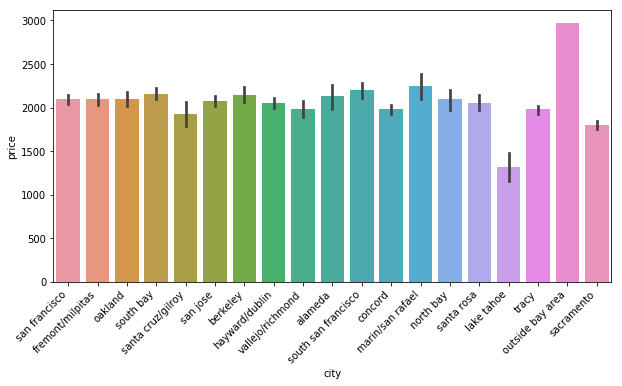

In [77]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="city", y="price", data=data, estimator=average)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

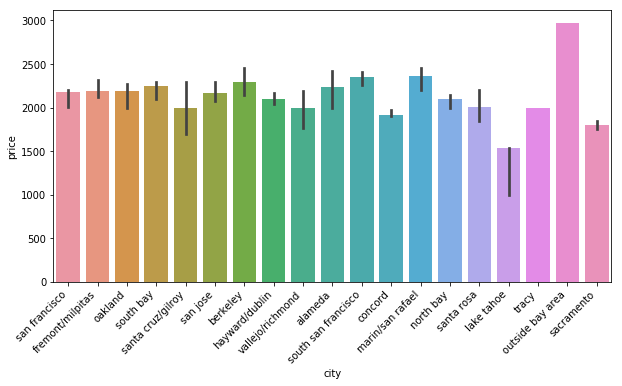

In [78]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="city", y="price", data=data, estimator=median)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

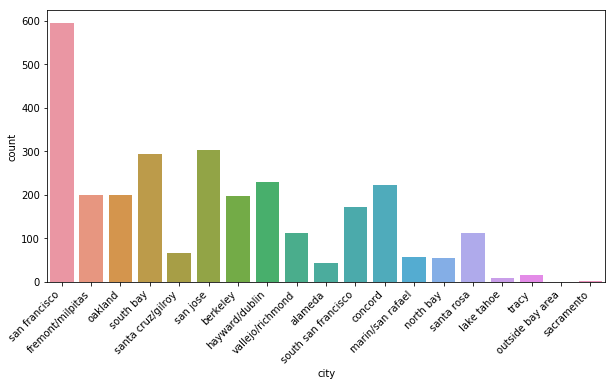

In [82]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='city', data=data)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

In [85]:
ignore = data[data['city'].isin(['outside bay area'])]
ignore

id                                               link                     created geotag        lat        lon                                               name   price             location       cl_id              city
1308  1309  https://sfbay.craigslist.org/nby/apa/d/midkiff...  2020-05-22 09:18:00.000000   None  31.474189 -101.83457  Private Tiburon rental, furnished/unf.  - pano...  2970.0  tiburon / belvedere  7127082925  outside bay area

# Second Set of Data

In [86]:
df = pd.read_sql_query('SELECT * FROM listing', connection)
df

id                                               link                     created geotag        lat         lon                                               name   price                                           location      sqft  bedrooms availability       cl_id
0        1  https://sfbay.craigslist.org/eby/apa/d/concord...  2020-05-23 23:17:00.000000   None  37.963114 -121.984892  Wonderful 3BR/2.5BA duplex in prime Concord lo...  2600.0                               danville / san ramon   1500ft2       3.0       may 31  7125541052
1        2  https://sfbay.craigslist.org/eby/roo/d/alameda...  2020-05-23 23:17:00.000000   None  37.773577 -122.269080  Large Master Bedroom W/ Private Bathroom in Be...  1200.0                                            alameda    175ft2       0.0               7129480434
2        3  https://sfbay.craigslist.org/scz/apa/d/capitol...  2020-05-23 23:16:00.000000   None  36.977932 -121.950656         Ground Floor Corner-Unit with Private Yard  2700.0                                           capitola   1080ft2       2.0        jun 2  7129479789
3        4  https://sfbay.craigslist.org/sfc/roo/d/san-fra...  2020-05-23 23:16:00.000000   None  37.787996 -122.393597  Spacious 1 Bed Available in 2B2B Apartment (Ea...  1550.0                                 SOMA / south beach                 0.0       jun 20  7129479886
4        5  https://sfbay.craigslist.org/pen/roo/d/los-alt...  2020-05-23 23:16:00.000000   None  37.376950 -122.111320  🌞Sunny Room on the Hills with Terrace + Jacuzz...  1575.0                                          los altos    140ft2       0.0       may 23  7129478723
5        6  https://sfbay.craigslist.org/eby/sub/d/berkele...  2020-05-23 23:16:00.000000   None  37.865114 -122.263005  [PRICE REDUCED] Quality Berkeley PENTHOUSE in ...  1995.0                                           berkeley    600ft2       1.0       may 23  7129480288
6        7  https://sfbay.craigslist.org/sby/roo/d/sunnyva...  2020-05-23 23:15:00.000000   None  37.367415 -122.001328  1b1b Master Bedroom in 2b2.5b Townhouse Availa...  1600.0                                          sunnyvale    890ft2       0.0       jun 20  7124396273
7        8  https://sfbay.craigslist.org/sby/roo/d/san-jos...  2020-05-23 23:15:00.000000   None  37.268500 -121.849000               Shared house, two bedrooms available  1500.0                                     san jose south   2100ft2       0.0       may 15  7123861663
8        9  https://sfbay.craigslist.org/pen/roo/d/palo-al...  2020-05-23 23:15:00.000000   None  37.481635 -122.137992                   furnished room in friendly house  1380.0                                     east palo alto    180ft2       0.0       may 23  7129480185
9       10  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:15:00.000000   None  37.834004 -122.269524           "FULLY REMODELED" 1 Bdrm, 1 Bath, Duplex  1595.0                                      North Oakland                 1.0               7129478661
10      11  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:14:00.000000   None  37.826909 -122.272953        "FULLY REMODELED" 2 Bdrm, 1 Bath, Apartment  2195.0                                         Emeryville                 2.0               7129478618
11      12  https://sfbay.craigslist.org/sfc/roo/d/daly-ci...  2020-05-23 23:14:00.000000   None  37.715758 -122.459055          1 bedroom on 2nd floor very close to CCSF  1160.0                            ingleside / SFSU / CCSF                 0.0               7125945301
12      13  https://sfbay.craigslist.org/sfc/roo/d/furnish...  2020-05-23 23:14:00.000000   None  37.750663 -122.425203        Furnished Small Room for Rent In Noe Valley  1350.0                                         noe valley     70ft2       0.0               7129480021
13      14  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:13:00.000000   None  37.803633 -122.271326  Lux Features! Downtown Oakland Conven

In [91]:
df['city'] = ""
df['location'] = df['location'].str.lower()

In [92]:
df['city'] = df['location'].map(reversed_dict)
df

id                                               link                     created geotag        lat         lon                                               name   price                                           location      sqft  bedrooms availability       cl_id                 city
0        1  https://sfbay.craigslist.org/eby/apa/d/concord...  2020-05-23 23:17:00.000000   None  37.963114 -121.984892  Wonderful 3BR/2.5BA duplex in prime Concord lo...  2600.0                               danville / san ramon   1500ft2       3.0       may 31  7125541052       hayward/dublin
1        2  https://sfbay.craigslist.org/eby/roo/d/alameda...  2020-05-23 23:17:00.000000   None  37.773577 -122.269080  Large Master Bedroom W/ Private Bathroom in Be...  1200.0                                            alameda    175ft2       0.0               7129480434              alameda
2        3  https://sfbay.craigslist.org/scz/apa/d/capitol...  2020-05-23 23:16:00.000000   None  36.977932 -121.950656         Ground Floor Corner-Unit with Private Yard  2700.0                                           capitola   1080ft2       2.0        jun 2  7129479789    santa cruz/gilroy
3        4  https://sfbay.craigslist.org/sfc/roo/d/san-fra...  2020-05-23 23:16:00.000000   None  37.787996 -122.393597  Spacious 1 Bed Available in 2B2B Apartment (Ea...  1550.0                                 soma / south beach                 0.0       jun 20  7129479886        san francisco
4        5  https://sfbay.craigslist.org/pen/roo/d/los-alt...  2020-05-23 23:16:00.000000   None  37.376950 -122.111320  🌞Sunny Room on the Hills with Terrace + Jacuzz...  1575.0                                          los altos    140ft2       0.0       may 23  7129478723            south bay
5        6  https://sfbay.craigslist.org/eby/sub/d/berkele...  2020-05-23 23:16:00.000000   None  37.865114 -122.263005  [PRICE REDUCED] Quality Berkeley PENTHOUSE in ...  1995.0                                           berkeley    600ft2       1.0       may 23  7129480288             berkeley
6        7  https://sfbay.craigslist.org/sby/roo/d/sunnyva...  2020-05-23 23:15:00.000000   None  37.367415 -122.001328  1b1b Master Bedroom in 2b2.5b Townhouse Availa...  1600.0                                          sunnyvale    890ft2       0.0       jun 20  7124396273            south bay
7        8  https://sfbay.craigslist.org/sby/roo/d/san-jos...  2020-05-23 23:15:00.000000   None  37.268500 -121.849000               Shared house, two bedrooms available  1500.0                                     san jose south   2100ft2       0.0       may 15  7123861663             san jose
8        9  https://sfbay.craigslist.org/pen/roo/d/palo-al...  2020-05-23 23:15:00.000000   None  37.481635 -122.137992                   furnished room in friendly house  1380.0                                     east palo alto    180ft2       0.0       may 23  7129480185            south bay
9       10  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:15:00.000000   None  37.834004 -122.269524           "FULLY REMODELED" 1 Bdrm, 1 Bath, Duplex  1595.0                                      north oakland                 1.0               7129478661              oakland
10      11  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:14:00.000000   None  37.826909 -122.272953        "FULLY REMODELED" 2 Bdrm, 1 Bath, Apartment  2195.0                                         emeryville                 2.0               7129478618             berkeley
11      12  https://sfbay.craigslist.org/sfc/roo/d/daly-ci...  2020-05-23 23:14:00.000000   None  37.715758 -122.459055          1 bedroom on 2nd floor very close to CCSF  1160.0                            ingleside / sfsu / ccsf                 0.0               7125945301        san francisco
12      13  https://sfbay.craigslist.org/sfc/roo/d/furnish...  2020-05-23 23:14:00.000000   None  37.750663 -122.425203        Furnished Small Room for Rent In 

In [101]:
fix = df[df['city'].isnull()]
fix.isnull().sum()

id               0
link             0
created          0
geotag          58
lat              0
lon              0
name             0
price            0
location         0
sqft             0
bedrooms         0
availability     0
cl_id            0
city            58
dtype: int64

In [129]:
import reverse_geocoder as rg

df.dtypes


id                int64
link             object
created          object
geotag           object
lat             float64
lon             float64
name             object
price           float64
location         object
sqft             object
bedrooms        float64
availability     object
cl_id             int64
city             object
dtype: object

In [169]:
def reverseGeocode(coordinates): 
    result = rg.search(coordinates)
    return (result)

def find_city(df):
    coordinates = list(zip(df['lat'],df['lon']))
    data = reverseGeocode(coordinates)
    df['city'] = [i['name'] for i in data]
    return df

df = find_city(df)


In [170]:
df

id                                               link                     created                    geotag        lat         lon                                               name   price                                           location      sqft  bedrooms availability       cl_id                        city
0        1  https://sfbay.craigslist.org/eby/apa/d/concord...  2020-05-23 23:17:00.000000  [37.963114, -121.984892]  37.963114 -121.984892  Wonderful 3BR/2.5BA duplex in prime Concord lo...  2600.0                               danville / san ramon   1500ft2       3.0       may 31  7125541052                     Concord
1        2  https://sfbay.craigslist.org/eby/roo/d/alameda...  2020-05-23 23:17:00.000000   [37.773577, -122.26908]  37.773577 -122.269080  Large Master Bedroom W/ Private Bathroom in Be...  1200.0                                            alameda    175ft2       0.0               7129480434                     Alameda
2        3  https://sfbay.craigslist.org/scz/apa/d/capitol...  2020-05-23 23:16:00.000000  [36.977932, -121.950656]  36.977932 -121.950656         Ground Floor Corner-Unit with Private Yard  2700.0                                           capitola   1080ft2       2.0        jun 2  7129479789                    Capitola
3        4  https://sfbay.craigslist.org/sfc/roo/d/san-fra...  2020-05-23 23:16:00.000000  [37.787996, -122.393597]  37.787996 -122.393597  Spacious 1 Bed Available in 2B2B Apartment (Ea...  1550.0                                 soma / south beach                 0.0       jun 20  7129479886               San Francisco
4        5  https://sfbay.craigslist.org/pen/roo/d/los-alt...  2020-05-23 23:16:00.000000    [37.37695, -122.11132]  37.376950 -122.111320  🌞Sunny Room on the Hills with Terrace + Jacuzz...  1575.0                                          los altos    140ft2       0.0       may 23  7129478723                   Los Altos
5        6  https://sfbay.craigslist.org/eby/sub/d/berkele...  2020-05-23 23:16:00.000000  [37.865114, -122.263005]  37.865114 -122.263005  [PRICE REDUCED] Quality Berkeley PENTHOUSE in ...  1995.0                                           berkeley    600ft2       1.0       may 23  7129480288                    Berkeley
6        7  https://sfbay.craigslist.org/sby/roo/d/sunnyva...  2020-05-23 23:15:00.000000  [37.367415, -122.001328]  37.367415 -122.001328  1b1b Master Bedroom in 2b2.5b Townhouse Availa...  1600.0                                          sunnyvale    890ft2       0.0       jun 20  7124396273                   Sunnyvale
7        8  https://sfbay.craigslist.org/sby/roo/d/san-jos...  2020-05-23 23:15:00.000000       [37.2685, -121.849]  37.268500 -121.849000               Shared house, two bedrooms available  1500.0                                     san jose south   2100ft2       0.0       may 15  7123861663                 Seven Trees
8        9  https://sfbay.craigslist.org/pen/roo/d/palo-al...  2020-05-23 23:15:00.000000  [37.481635, -122.137992]  37.481635 -122.137992                   furnished room in friendly house  1380.0                                     east palo alto    180ft2       0.0       may 23  7129480185              East Palo Alto
9       10  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:15:00.000000  [37.834004, -122.269524]  37.834004 -122.269524           "FULLY REMODELED" 1 Bdrm, 1 Bath, Duplex  1595.0                                      north oakland                 1.0               7129478661                  Emeryville
10      11  https://sfbay.craigslist.org/eby/apa/d/oakland...  2020-05-23 23:14:00.000000  [37.826909, -122.272953]  37.826909 -122.272953        "FULLY REMODELED" 2 Bdrm, 1 Bath, Apartment  2195.0                                         emeryville                 2.0               7129478618                  Emeryville
11      12  https://sfbay.craigslist.org/sfc/roo/d/daly-ci...  2020-05-23 23:14:00.000000  [37.715758, -122.459055]  37.715758 -122.459055      